In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'whitegrid')


from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


boston = pd.read_csv('../data/housing.csv', delimiter=r"\s+", names = columns)
# Top 5 rows of the boston dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Factors : \t", boston.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Factors : 	 13
		Number of Samples : 	 506


In [4]:
#Check for null values and visualizing it using heatmap
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distribut

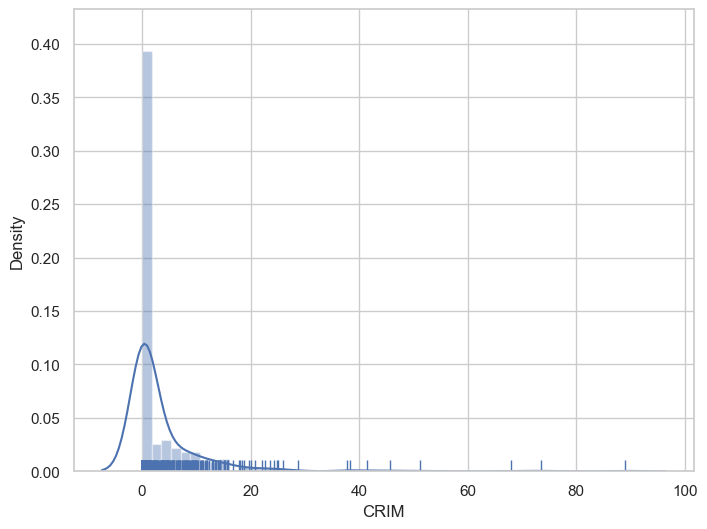

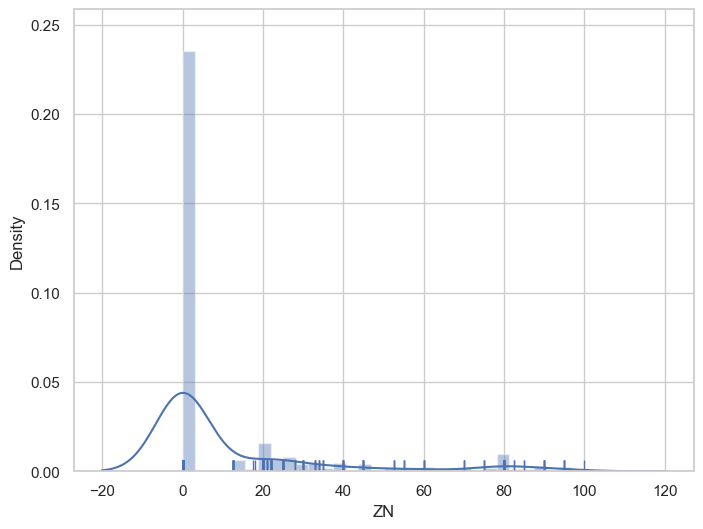

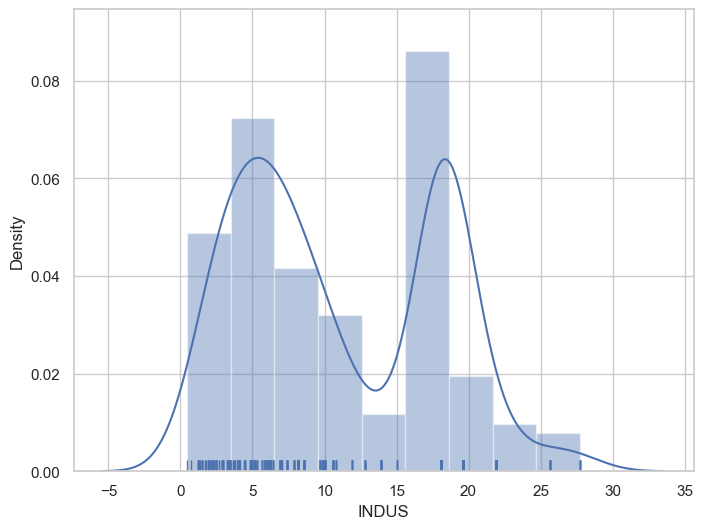

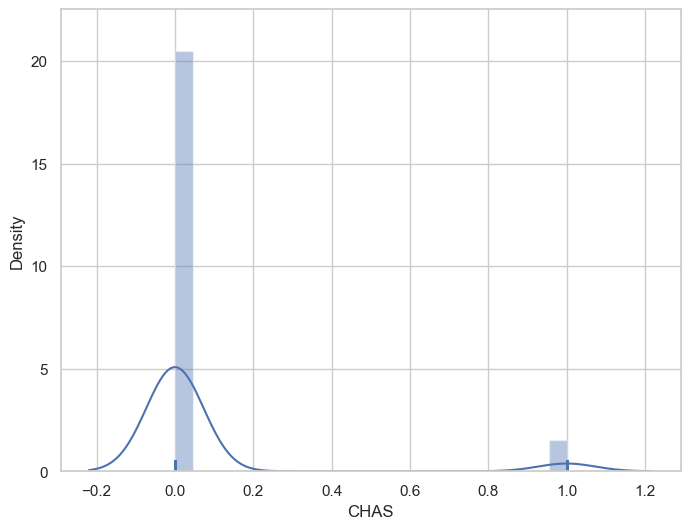

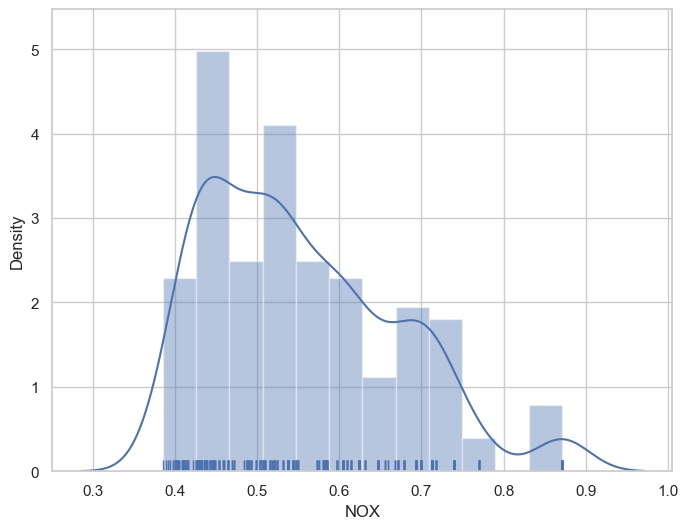

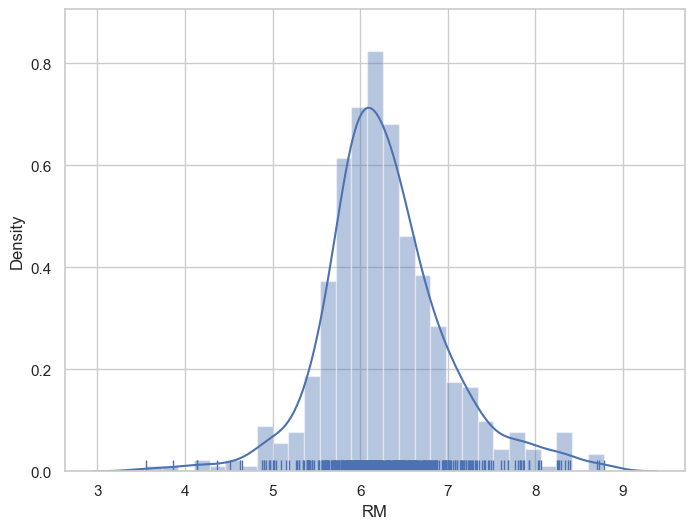

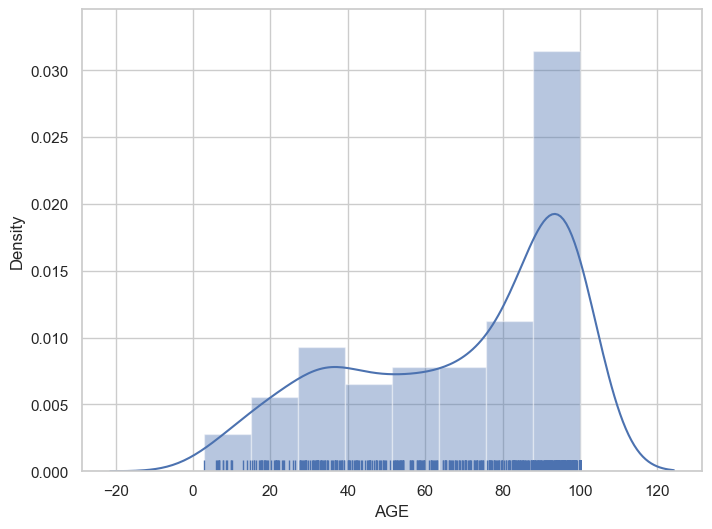

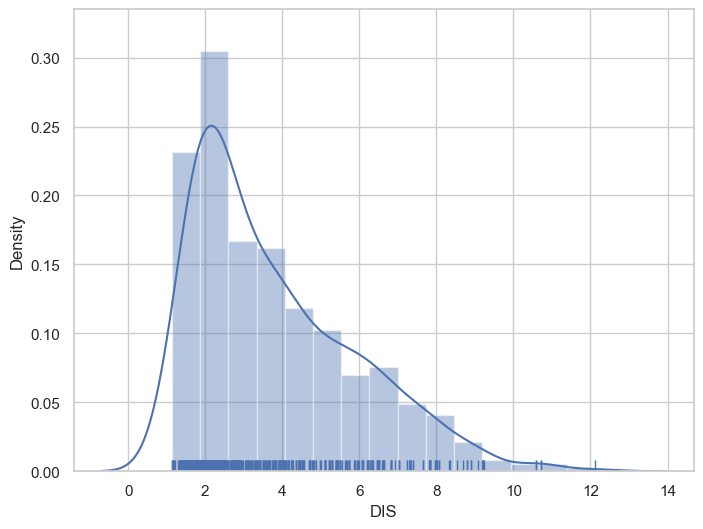

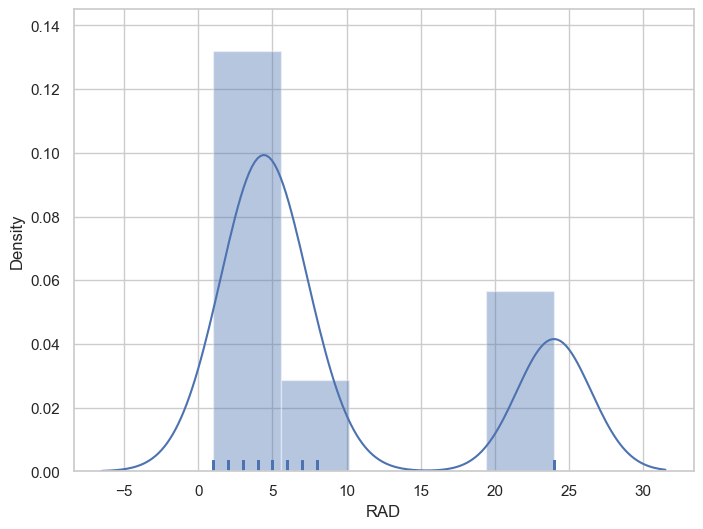

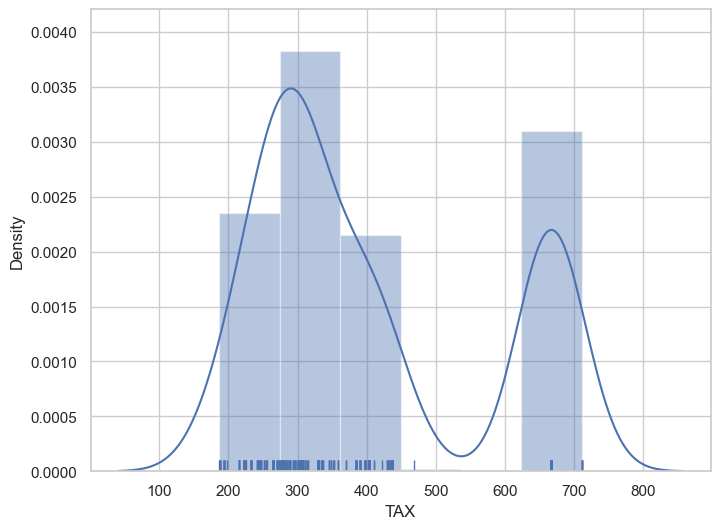

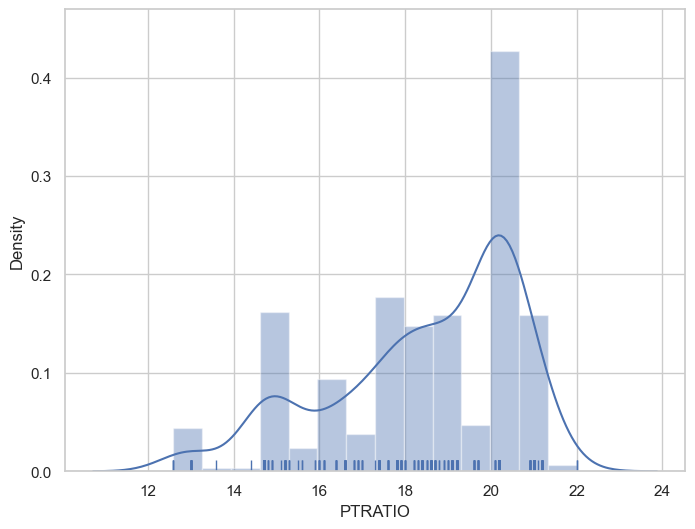

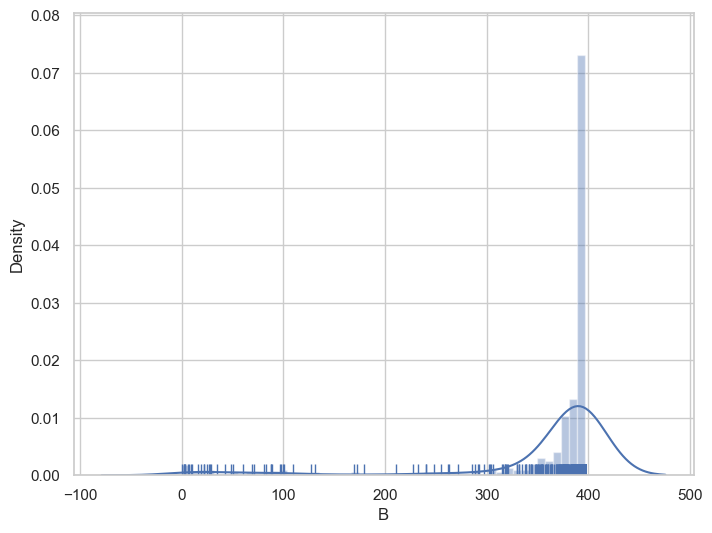

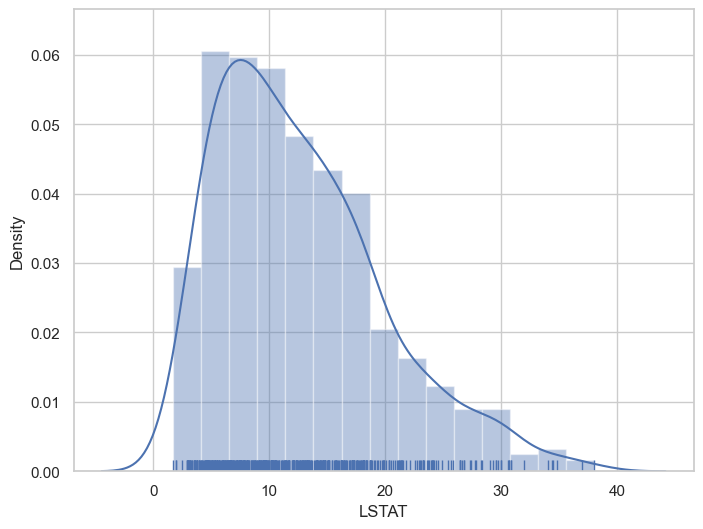

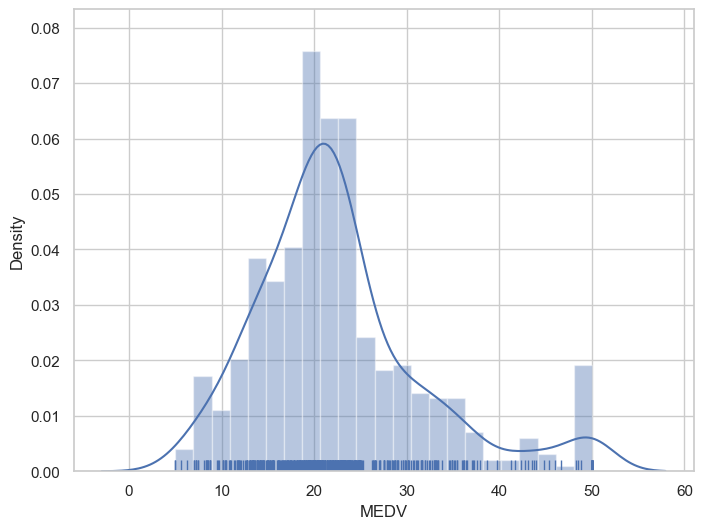

In [5]:
plt.figure(figsize=(8, 6))
sb.distplot(boston['CRIM'], rug = True)
plt.savefig('../images/crim.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['ZN'], rug = True)
plt.savefig('../images/zn.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['INDUS'], rug = True)
plt.savefig('../images/indus.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['CHAS'], rug = True)
plt.savefig('../images/chas.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['NOX'], rug = True)
plt.savefig('../images/nox.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['RM'], rug = True)
plt.savefig('../images/rm.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['AGE'], rug = True)
plt.savefig('../images/age.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['DIS'], rug = True)
plt.savefig('../images/dis.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['RAD'], rug = True)
plt.savefig('../images/rad.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['TAX'], rug = True)
plt.savefig('../images/tax.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['PTRATIO'], rug = True)
plt.savefig('../images/ptration.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['B'], rug = True)
plt.savefig('../images/b.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['LSTAT'], rug = True)
plt.savefig('../images/lstat.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['MEDV'], rug = True)
plt.savefig('../images/medv.png')

<Figure size 400x400 with 0 Axes>

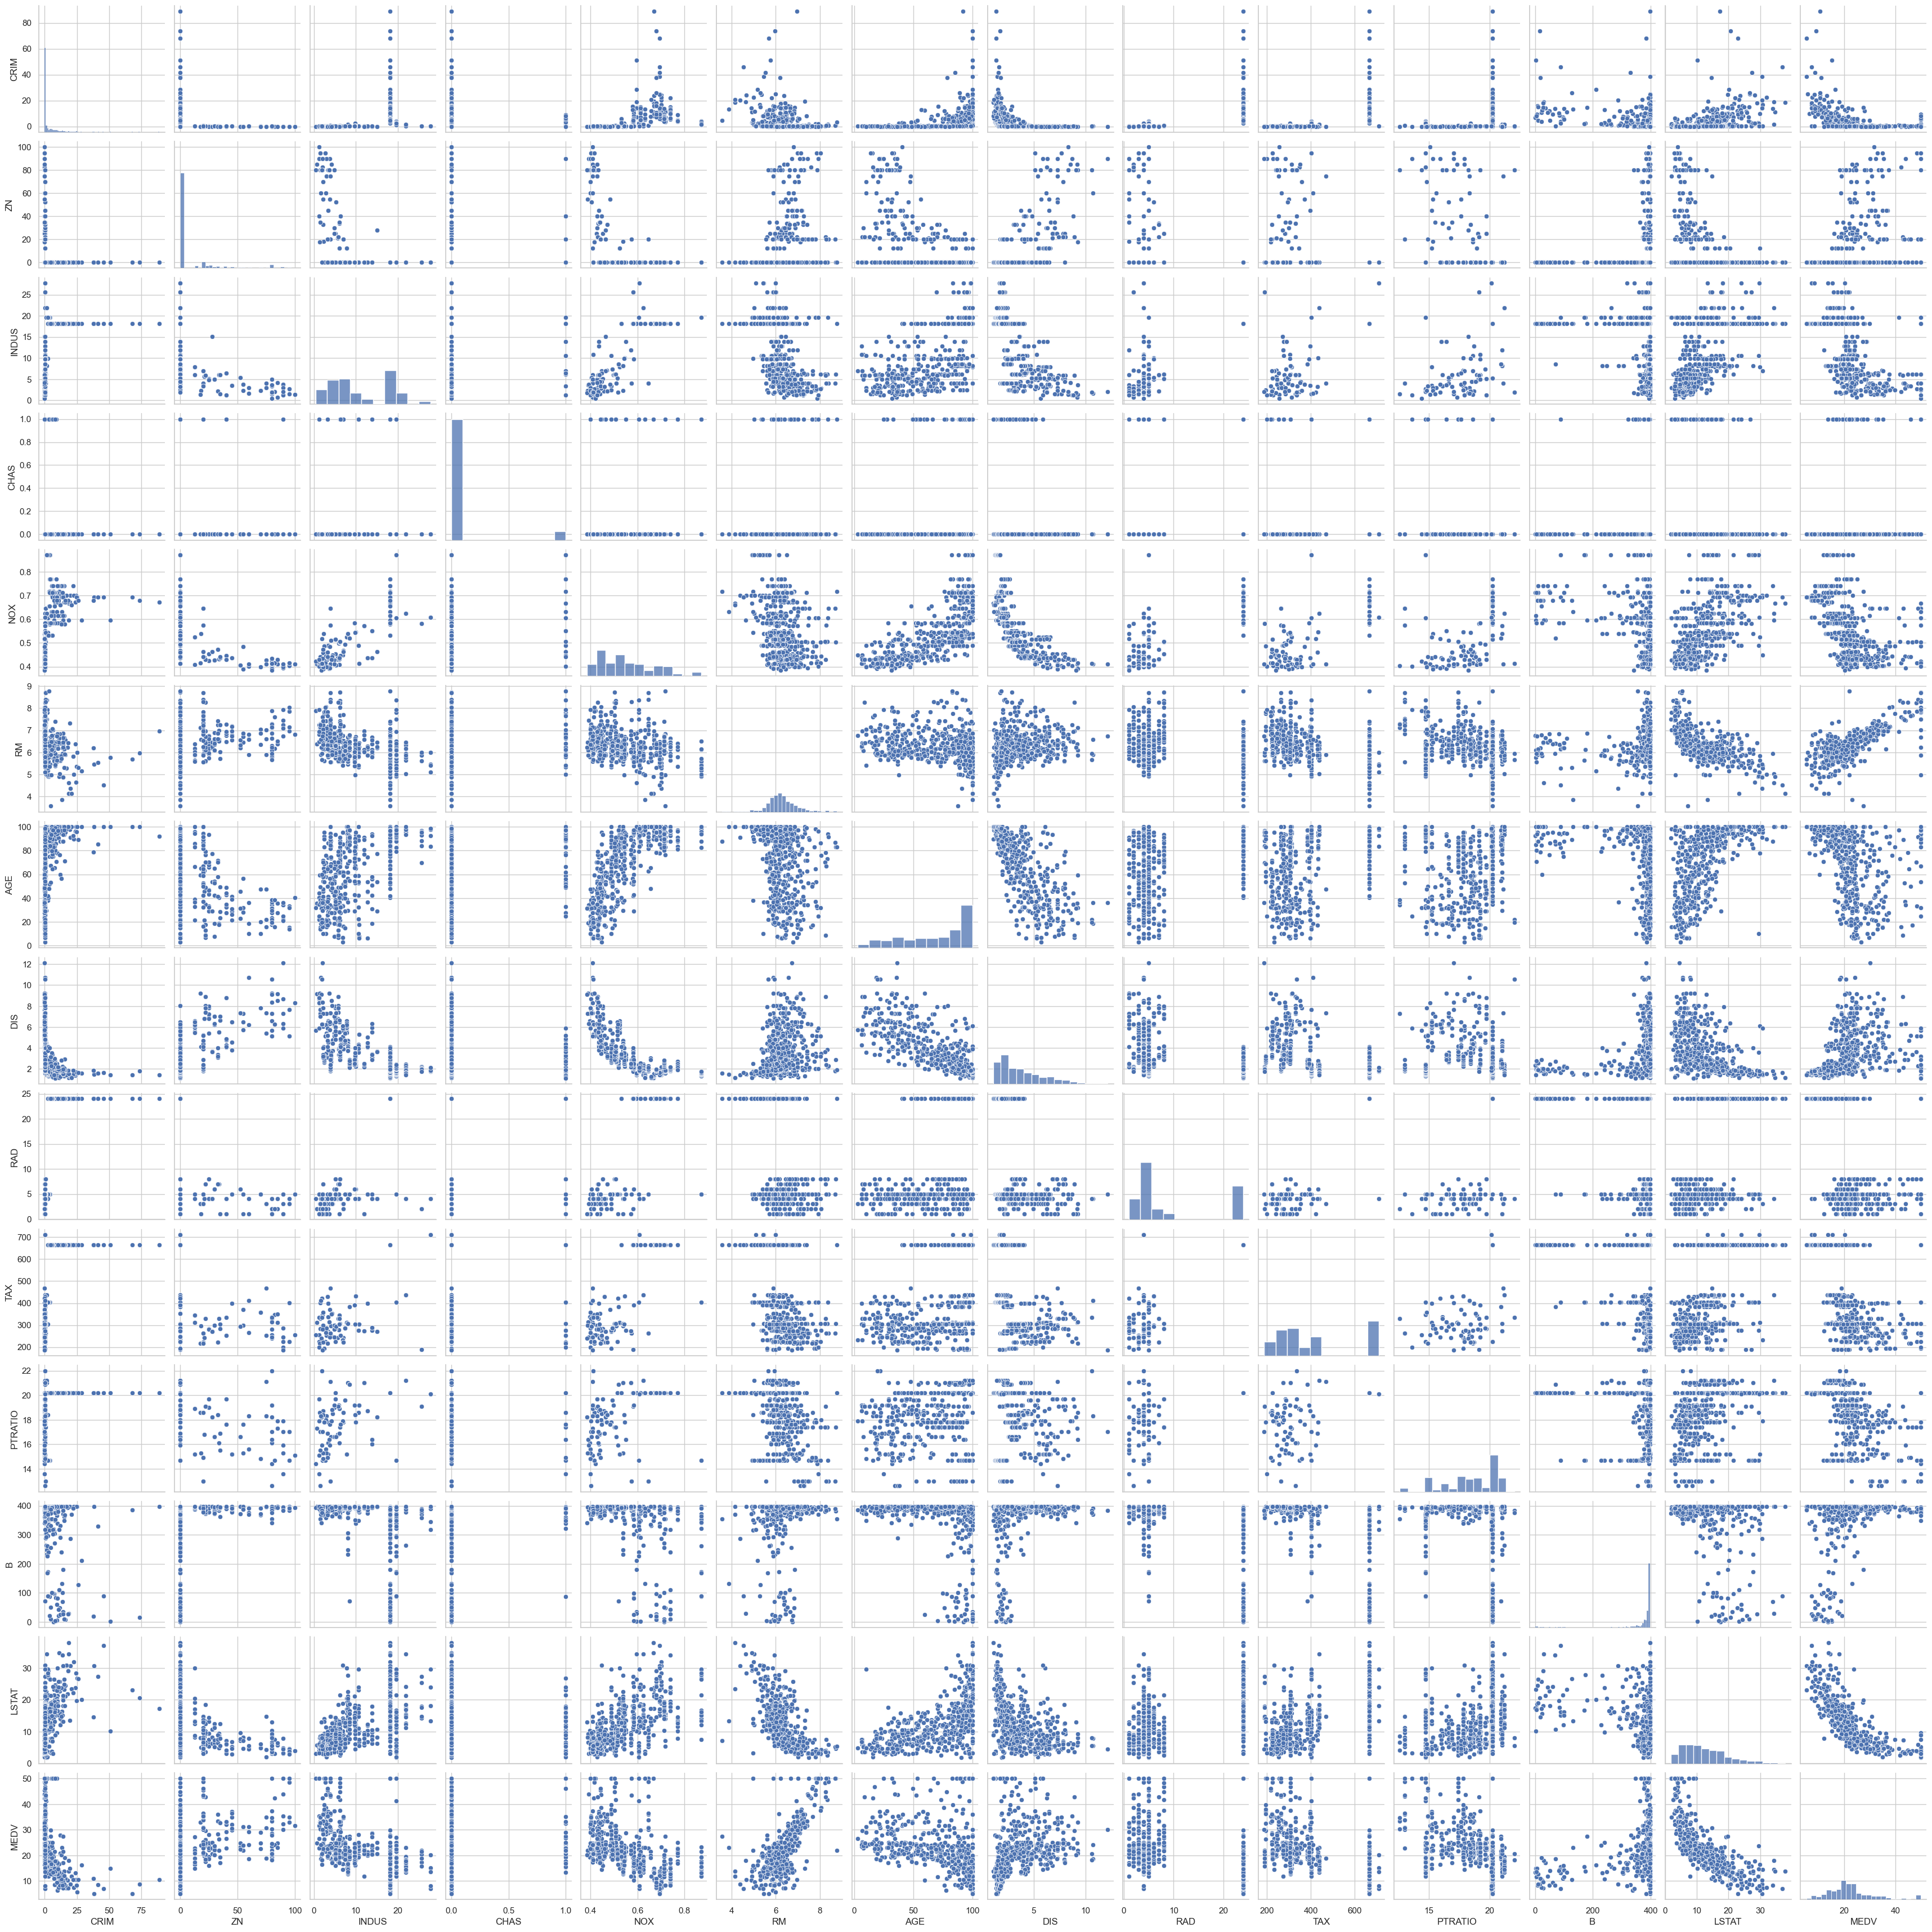

In [6]:
plt.figure(figsize  = (4, 4))
sb.pairplot(boston)
plt.savefig('../images/pairplot.png')

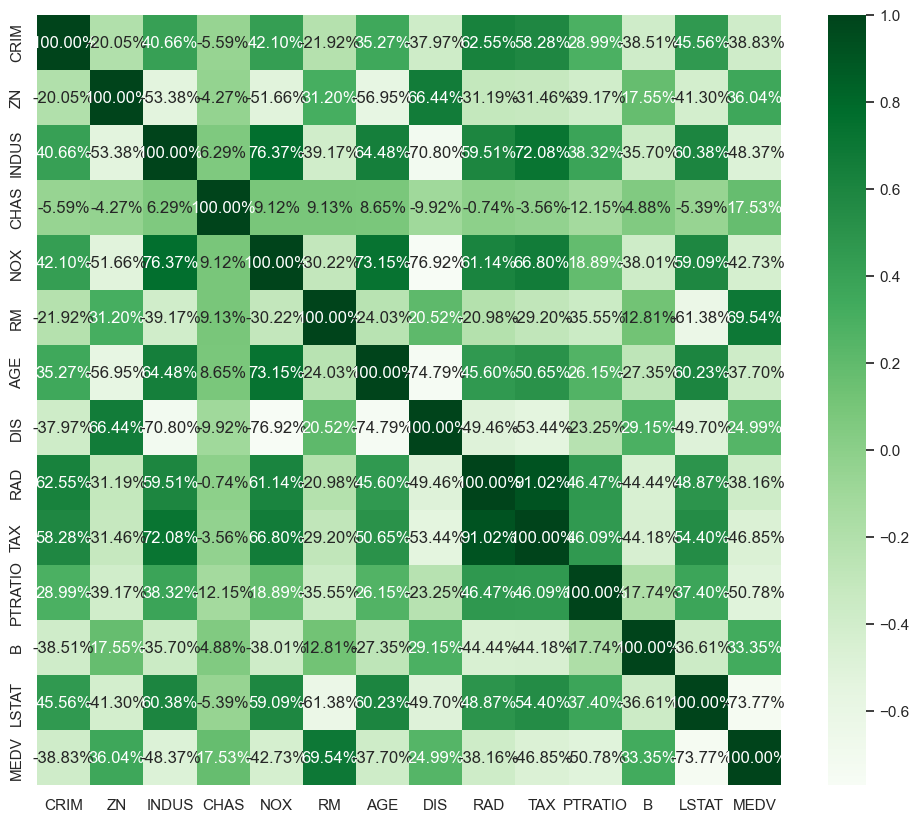

In [42]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (12, 10))
sb.heatmap(boston.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.savefig('../images/features_correlation.png')

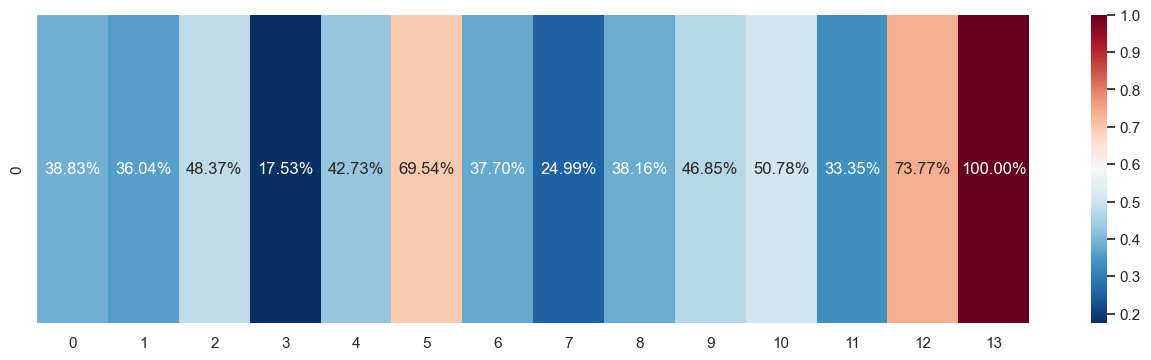

In [8]:
#Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['MEDV'])

plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('../images/correlation_with_price.png')

In [9]:
# Let's see the features having more correlation
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

In [10]:
# Let's confirm this by using ExtraTreesRegressor
# TODO : To know the feature Importances
y = boston['MEDV'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(boston.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        2.752275
ZN          0.410176
INDUS       3.298829
CHAS        1.631287
NOX         4.111750
RM         31.799812
AGE         1.893503
DIS         3.067716
RAD         2.156518
TAX         3.762102
PTRATIO     5.893524
B           1.936367
LSTAT      37.286142
dtype: float64

In [11]:
#Building Machine Learning Model

In [12]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'NOX', 'TAX', 'INDUS', 'DIS', 'CRIM', 'RAD',
       'B', 'AGE', 'CHAS', 'ZN'],
      dtype='object')

In [13]:
y = boston.loc[:, 'MEDV'].values

In [14]:
# Arranging columns based on features importance
new_boston = boston[features_arranged_on_importance]
new_boston.head()

,LSTAT,RM,PTRATIO,NOX,TAX,INDUS,DIS,CRIM,RAD,B,AGE,CHAS,ZN
0,4.98,6.575,15.3,0.538,296.0,2.31,4.0900,0.00632,1,396.90,65.2,0,18.0
1,9.14,6.421,17.8,0.469,242.0,7.07,4.9671,0.02731,2,396.90,78.9,0,0.0
2,4.03,7.185,17.8,0.469,242.0,7.07,4.9671,0.02729,2,392.83,61.1,0,0.0
3,2.94,6.998,18.7,0.458,222.0,2.18,6.0622,0.03237,3,394.63,45.8,0,0.0
4,5.33,7.147,18.7,0.458,222.0,2.18,6.0622,0.06905,3,396.90,54.2,0,0.0


In [15]:
# Getting boston values
X = new_boston.values
X = X[:, :6]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [16]:
#Know we are going to implement different machine learning algorithms and choose which one is more accurate and precise 

In [17]:
#Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6906984575653774
Testing Score  :  0.6209548378098428
R2 Score :  0.6209548378098428
MSE :  27.796815732022434


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))

Training Score :  0.6906984575653775
Testing Score  :  0.6209548378098447
R2 Score :  0.6209548378098447


In [20]:
#Decision Tree Regression

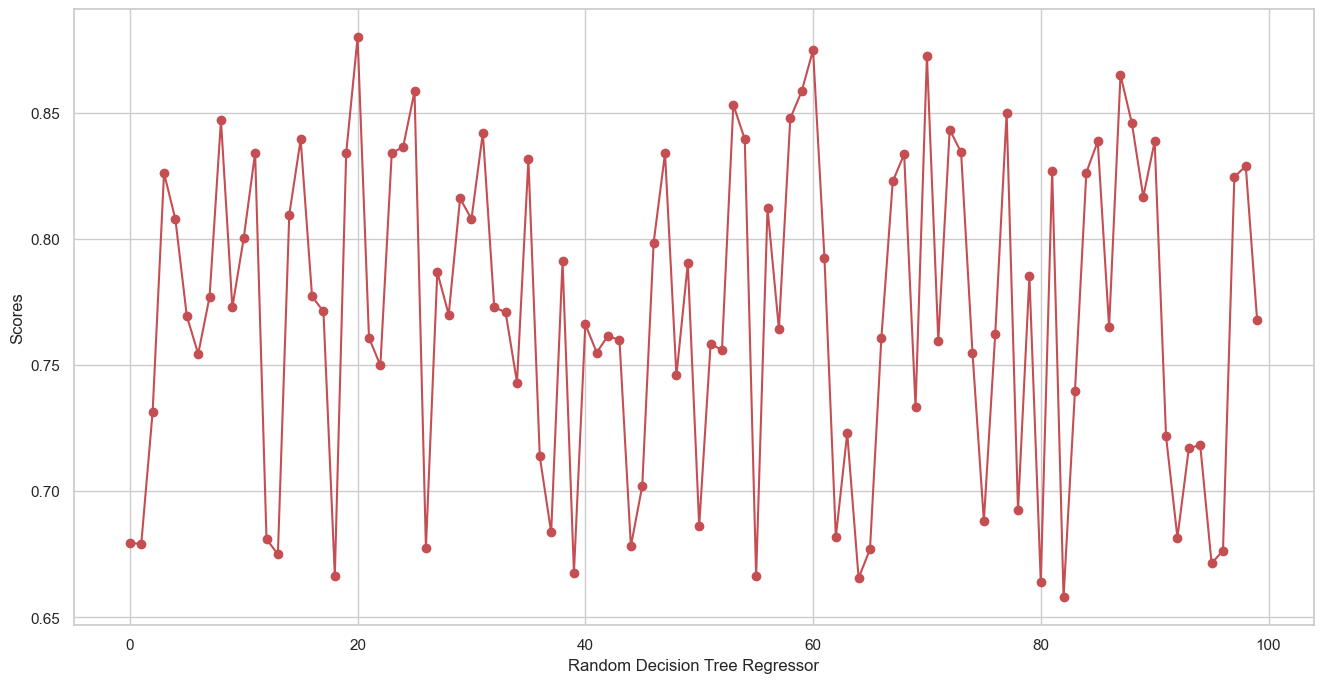

In [21]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.savefig('../images/random_decision_tree_regressor.png')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.8261708523650138
R2 Score :  0.8261708523650138
MSE :  12.747549019607844


In [23]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9960886512531352
Testing Score  :  0.8301595476960433
R2 Score :  0.8301595476960433
MSE :  12.455042901109532


In [24]:
#Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.9558019508765724
Testing Score  :  0.8569785636474783
R2 Score :  0.8569785636474783
MSE :  10.488303000753762


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.6209548378098428
Decision Tree Regression : 
Score :  0.8261708523650138
Random Forest Regression : 
Score :  0.8569785636474783
k Neighbors Regression : 
Score :  0.6094868472810563


In [27]:
#As we have seen above Random forest regression has high accuracy comparing to anothers

In [28]:
#Building optimal Random Regression Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

Random Forest Regression : 
Score :  0.944604428627572


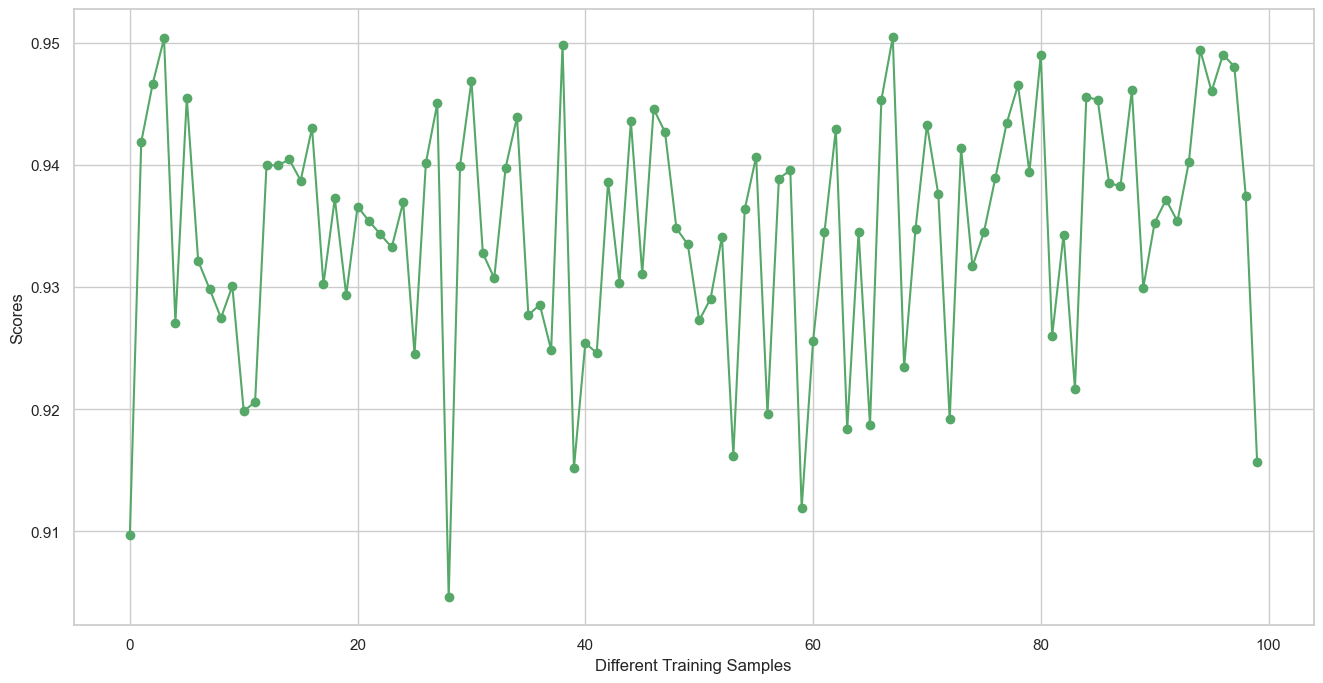

In [30]:
# Scores for different training samples
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.savefig('../images/random_forest_diff_train_samples.png')
plt.show()

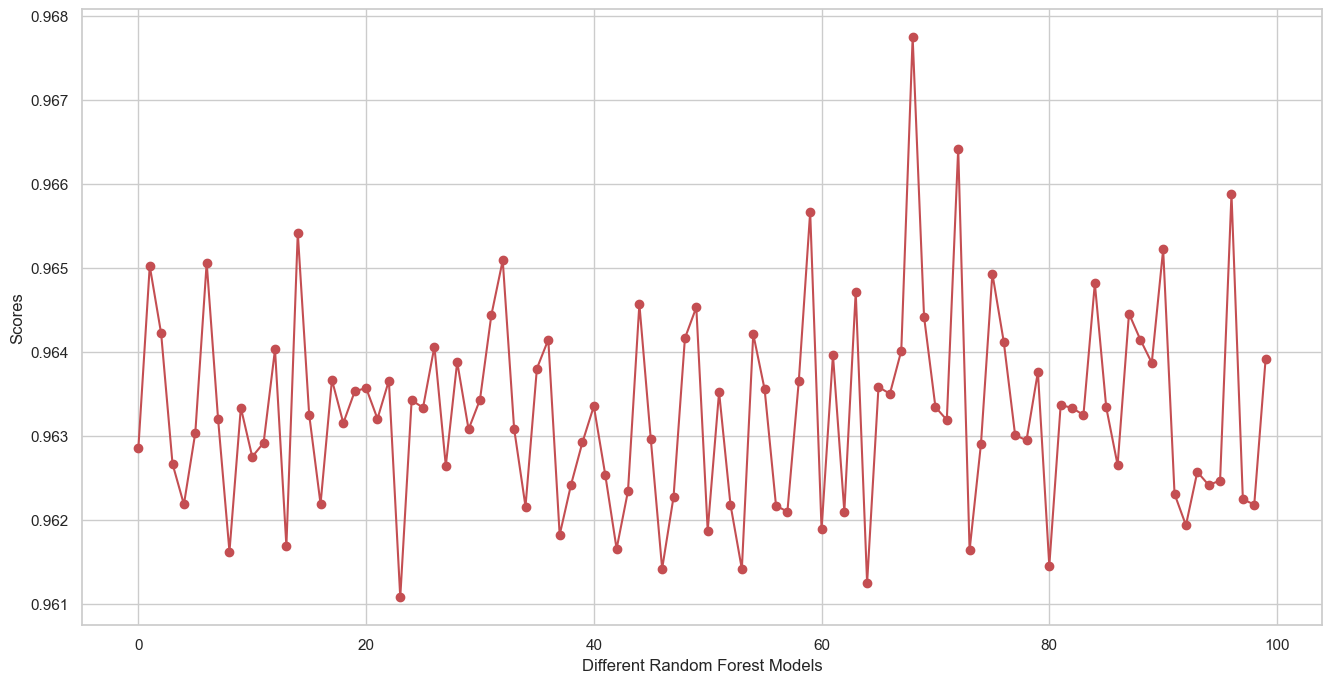

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.savefig('../images/random_forest_diff_RF_models.png')
plt.show()

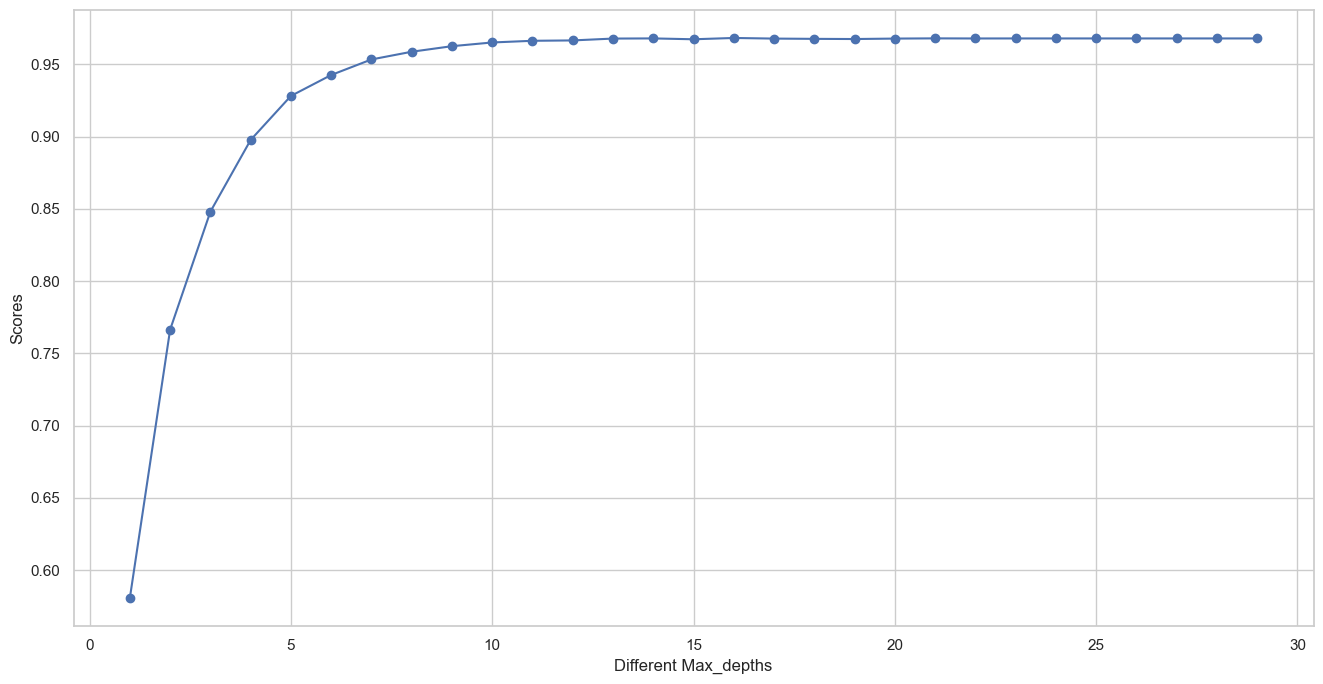

In [41]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.savefig('../images/random_forest_diff_max_depth.png')
plt.show()

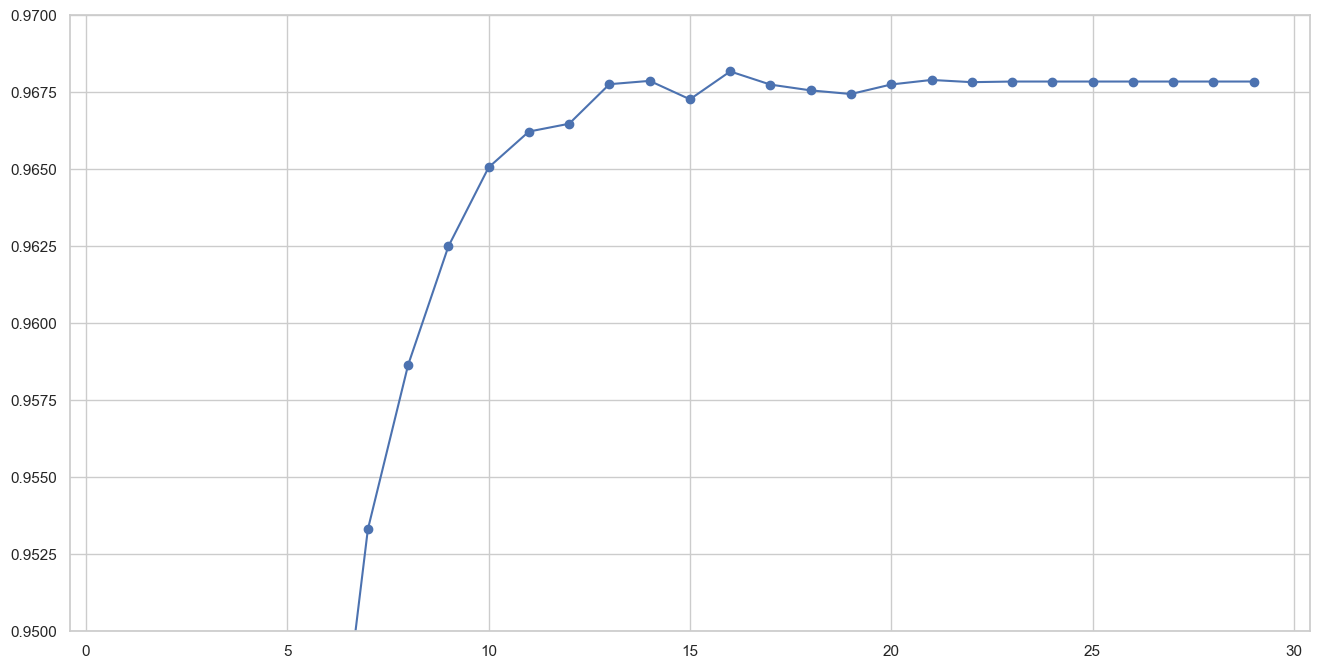

In [33]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

In [34]:
#Building Model 

In [35]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=68)

In [36]:
random_forest_regressor.score(X, y)

0.9677470657400227

In [37]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9790906632142617
Testing Accuracy  :  0.9216504267326483


In [38]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  6.483803497771104
Root Mean Squared Error :  2.5463313801960465
Score :  0.9677470657400227
